\begin{center}
Gabe Morris
\end{center}

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import fsolve

plt.style.use('../maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 3613 & Final Exam & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 1
## Given

$$T(s)=\frac{X(s)}{Y(s)}=\frac{10}{10s^2+15s+17}$$

## Find
For the transfer function above,

a. Plot the magnitude ($M(\omega)$ not in decibels) and phase response for $0.1\le\omega<10\,rad/s$. You can use whichever method you prefer, but only use the `bode()` function for checking.
b. Find the resonant frequency $\omega_r$.
c. If the input function is $y(t)=11\sin(5t)$, find the steady state function $x_{ss}(t)$. Plot the result with the transient response up to 6 seconds.

## Solution
### Part A - Plotting the Frequency Response (20 Points)

In [2]:
m, c, k = 10, 15, 17

T_jw = lambda om: 10/(m*(1j*om)**2 + c*1j*om + k)

T = ct.tf(10, [m, c, k])
T

TransferFunction(array([10]), array([10, 15, 17]))

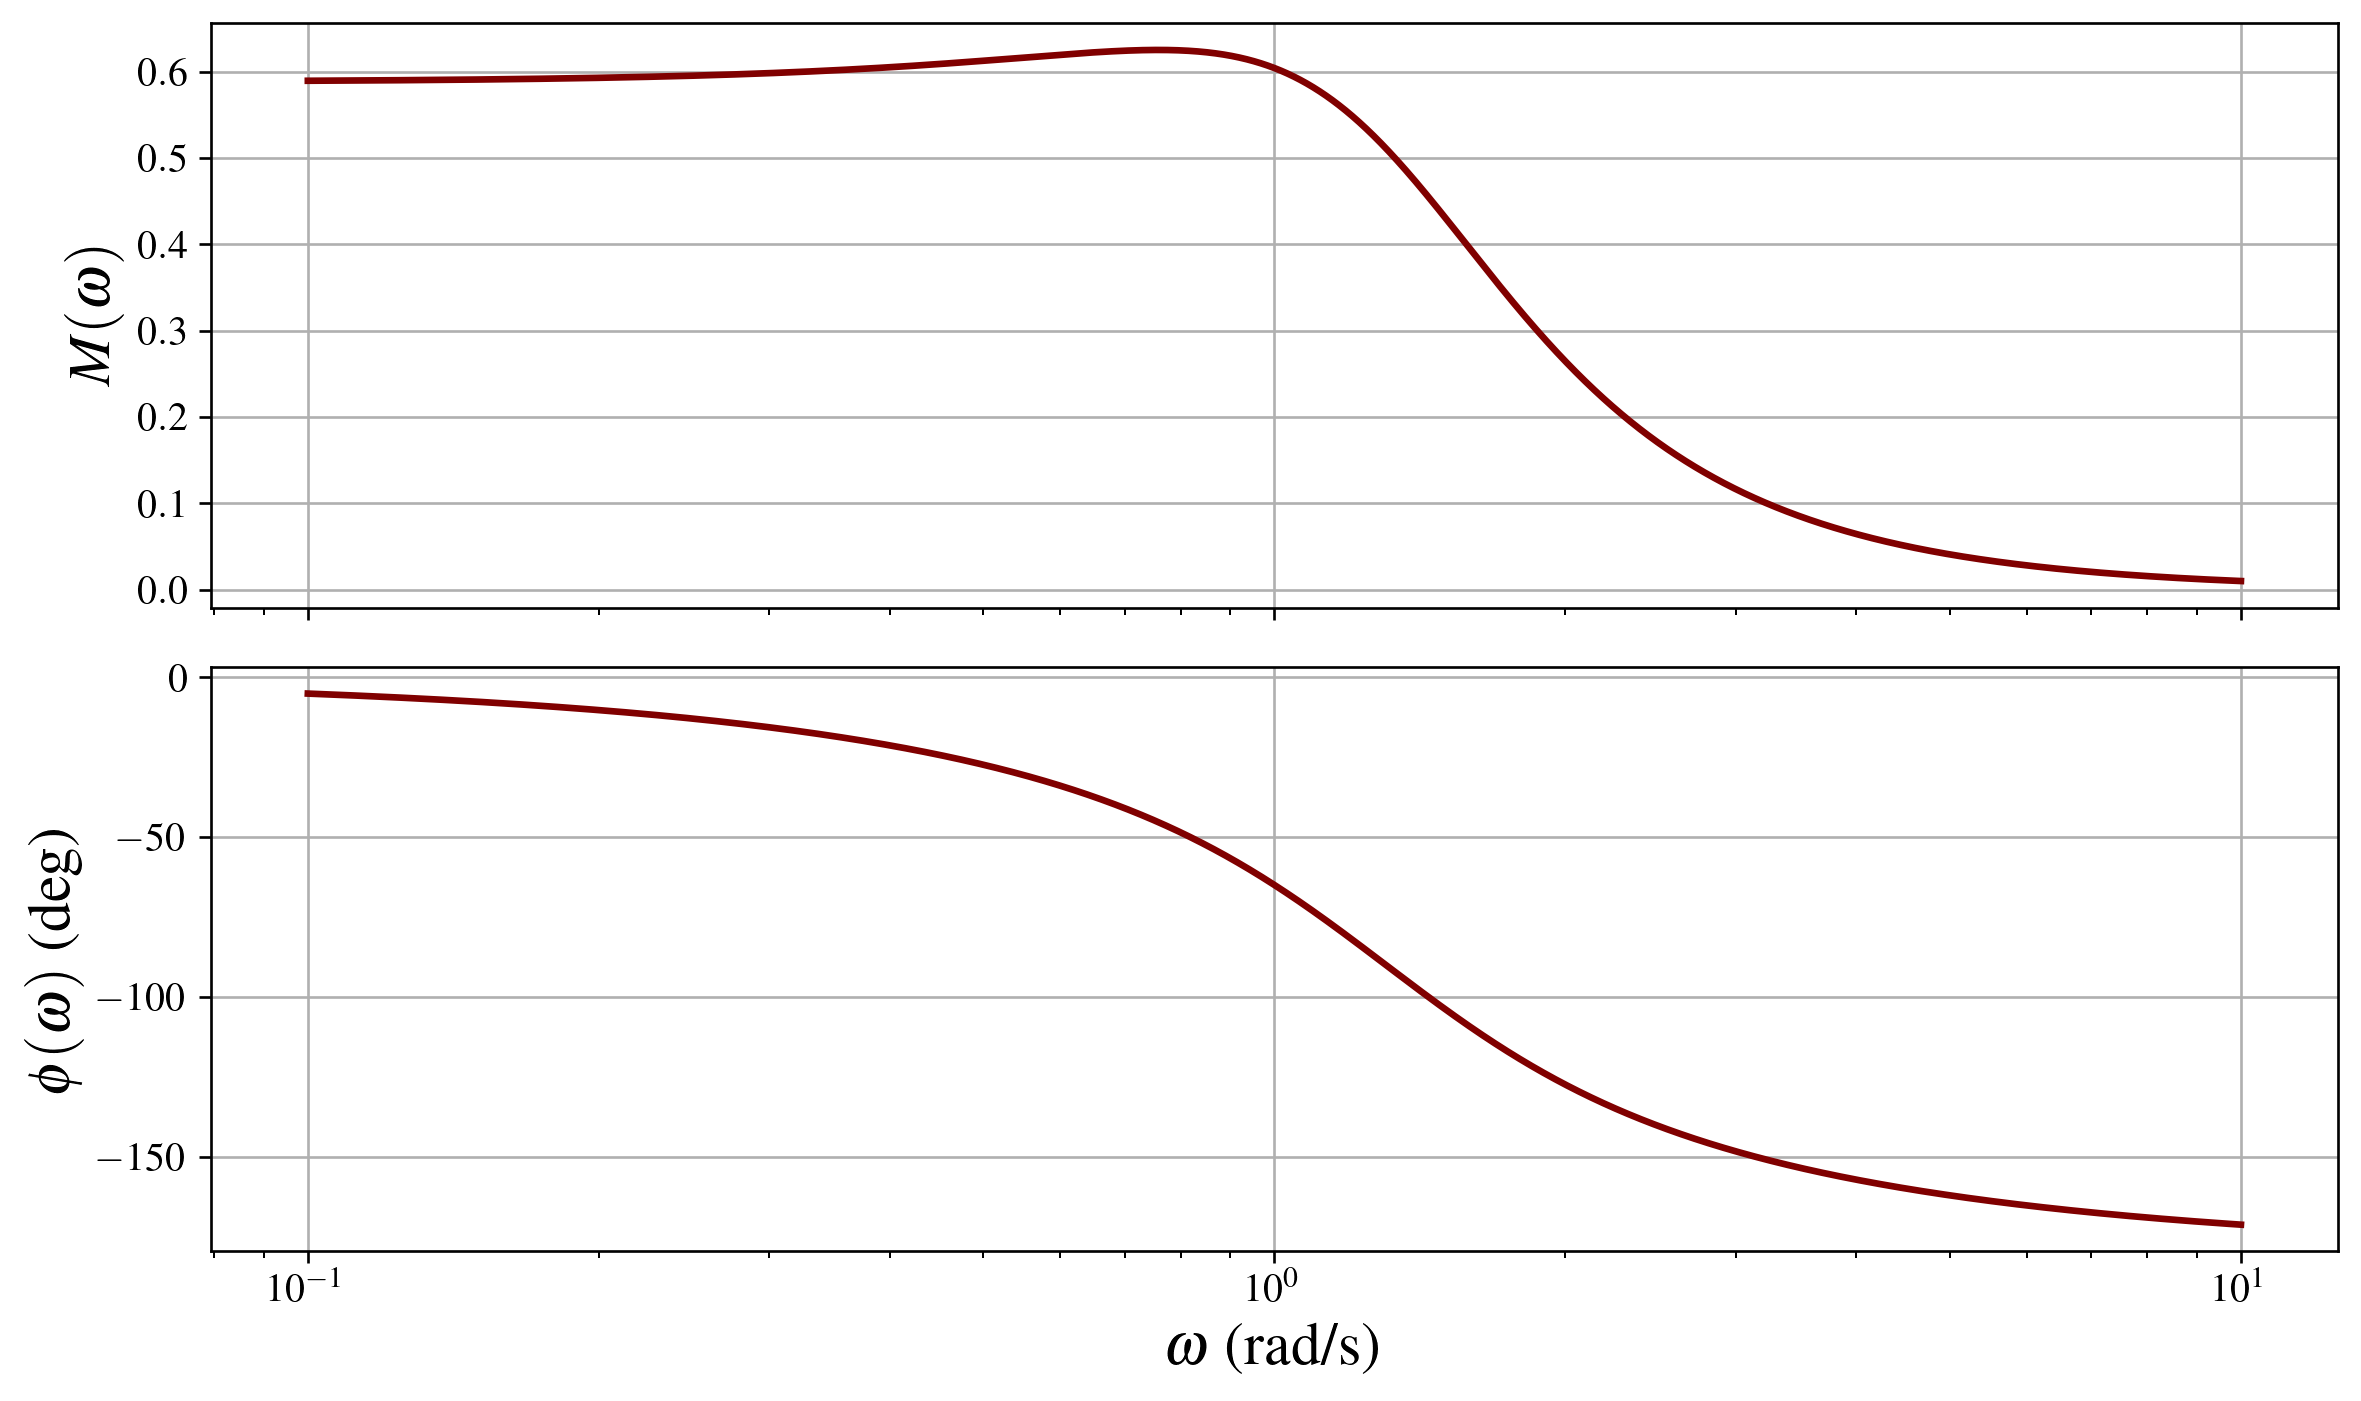

In [3]:
omegas = np.linspace(0.1, 10, 10_000)
mag = np.abs(T_jw(omegas))
phase = np.angle(T_jw(omegas))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
ax1.set_xscale('log')

ax1.plot(omegas, mag)
# ax1.plot(omegas, 20*np.log10(mag))
ax1.set_ylabel(r'$M(\omega)$')

ax2.plot(omegas, np.rad2deg(phase))
ax2.set_ylabel(r'$\phi(\omega)$ (deg)')
ax2.set_xlabel(r'$\omega$ (rad/s)')
plt.show()

### Part B - Finding the Resonant Frequency (10 Points)

In [4]:
wn = np.sqrt(k/m)
zeta = c/(2*np.sqrt(k*m))
wr = wn*np.sqrt(1 - 2*zeta**2)
wr  # rad/s

0.7582875444051551

In [5]:
omegas[max(mag) == mag][0]  # rad/s

0.7584158415841584

### Part C - Getting the Transient and Steady State Response (20 Points)

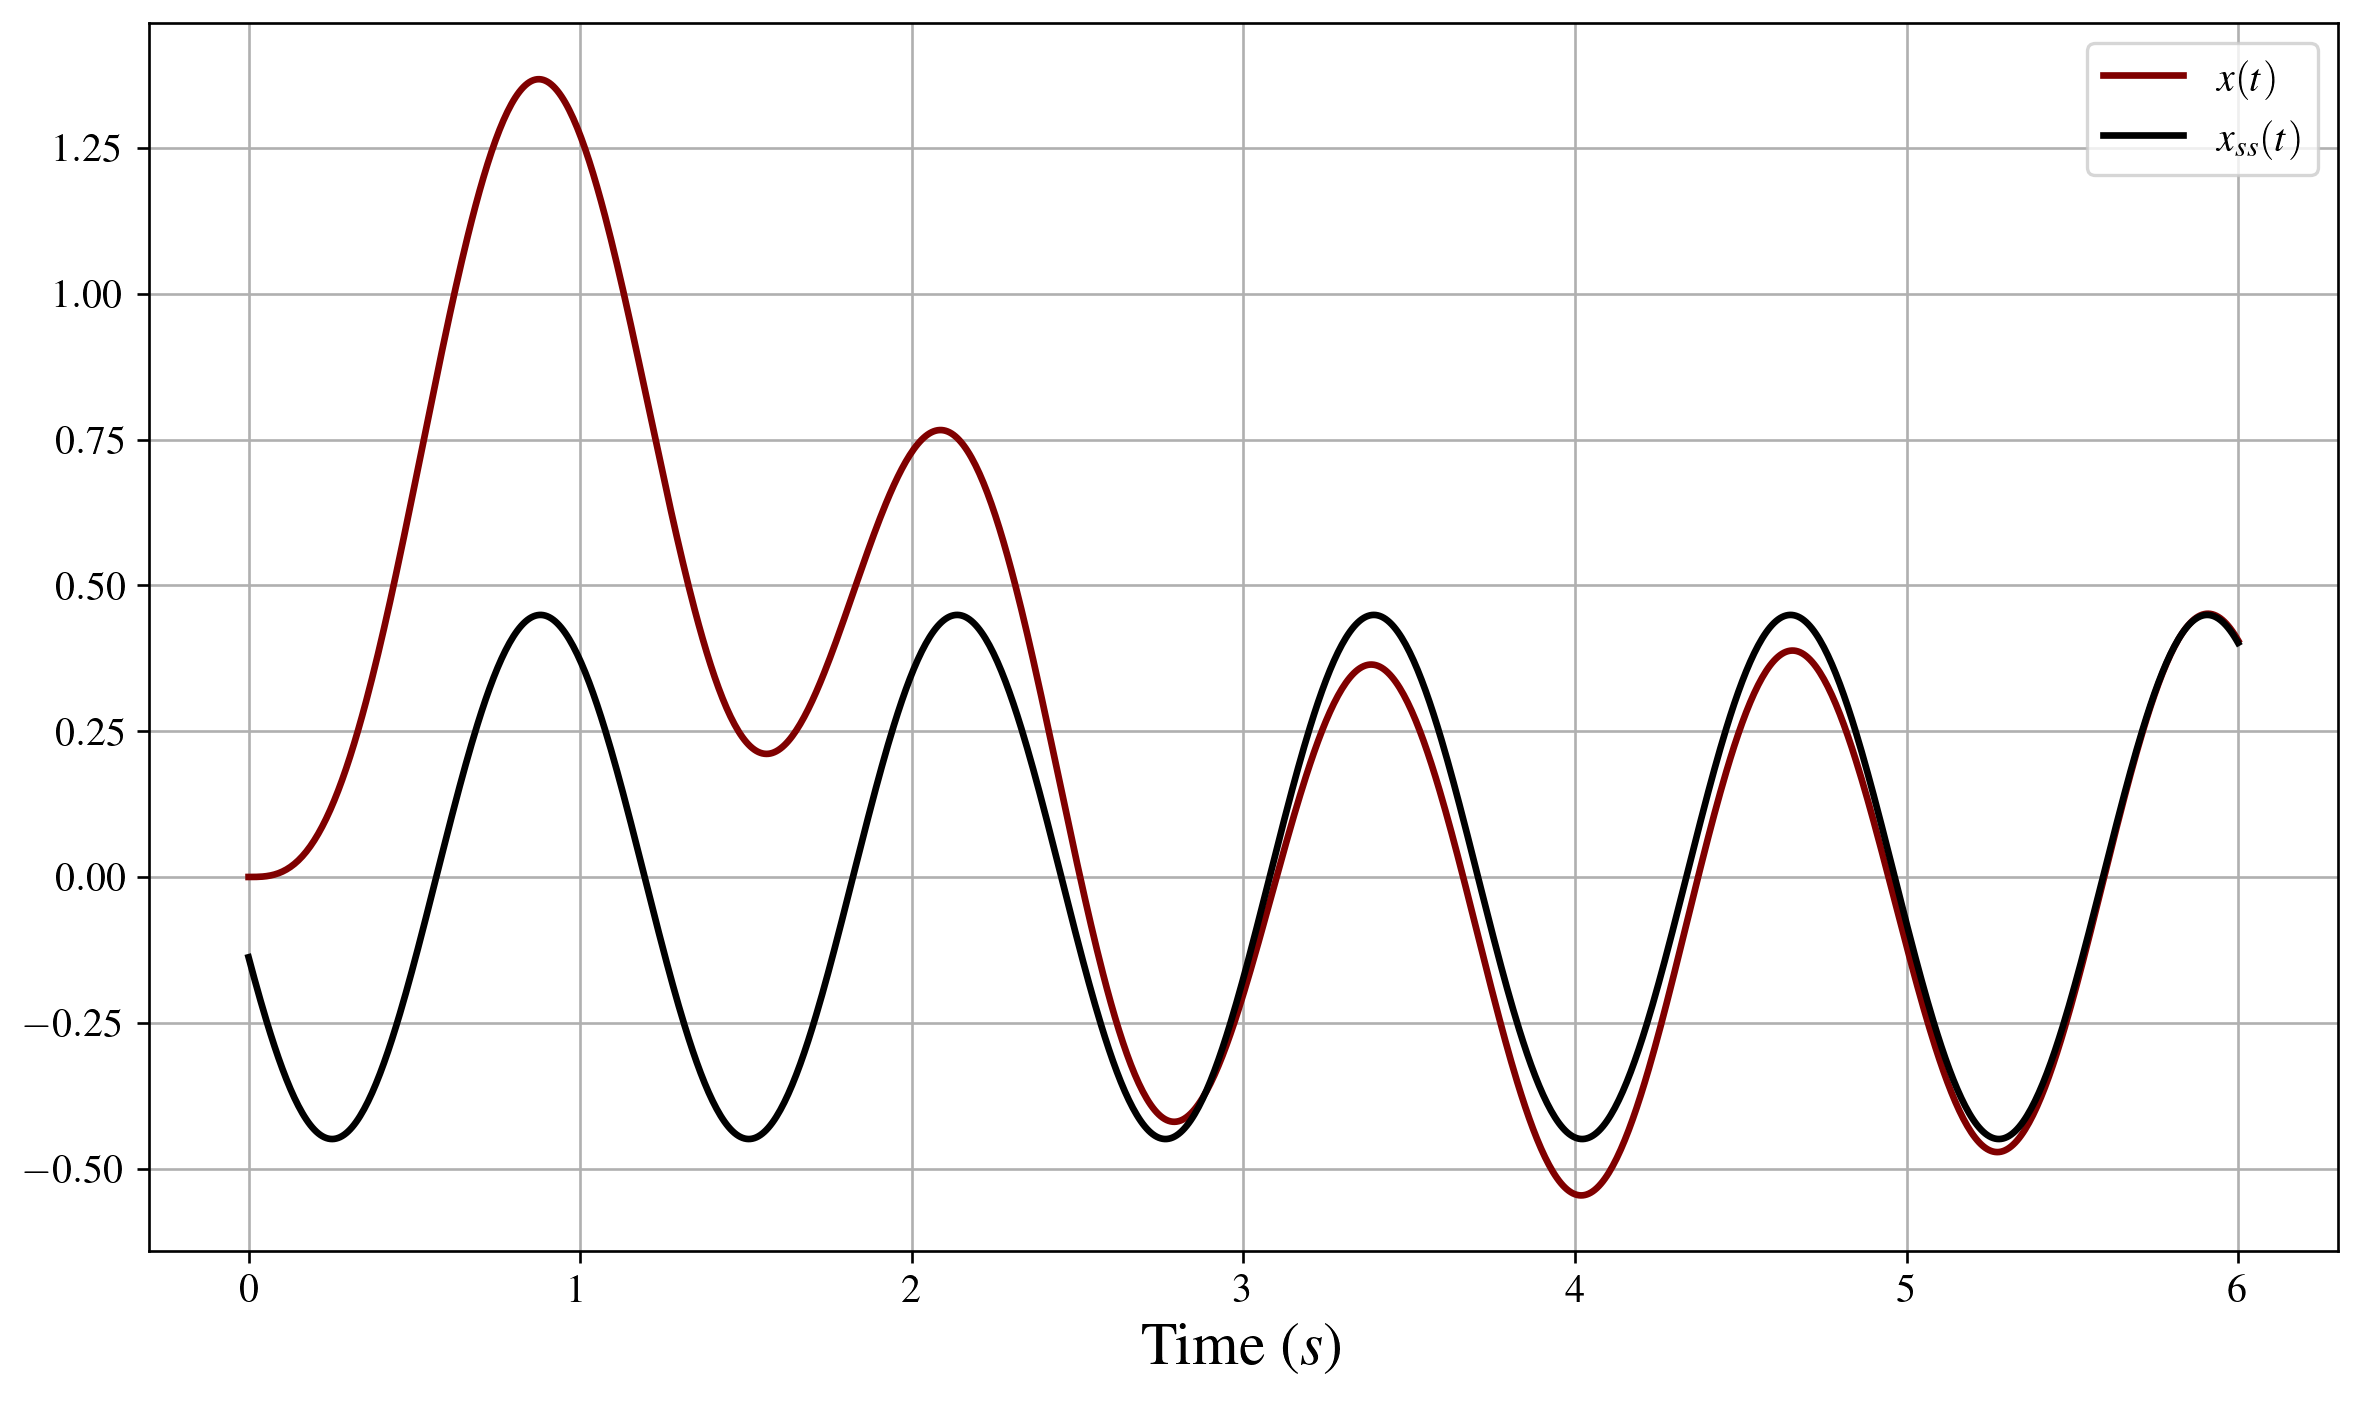

In [6]:
A = 11
w = 5

B = A*np.abs(T_jw(w))
phi = np.angle(T_jw(w))
x_ss = lambda t_: B*np.sin(w*t_ + phi)

t_array = np.linspace(0, 6, 1000)
_, x_t = ct.forced_response(T, T=t_array, U=A*np.sin(t_array*w))

plt.plot(t_array, x_t, label='$x(t)$')
plt.plot(t_array, x_ss(t_array), label='$x_{ss}(t)$')
plt.legend()
plt.xlabel('Time ($s$)')
plt.show()

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 3613 & Final Exam & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 2
## Given

$$T(s)=\frac{1}{30s^2+30s+40}$$

## Find
For the transfer function above,

a. Find the analytical solution for the magnitude response ($M(\omega)$).
b. Plot the magnitude response from $0.1\le\omega<10\,rad/s$.
c. Find the bandwidth ($\omega_1$ to $\omega_2$) and classify the filter type.

## Solution
### Part A - Finding the Magnitude Response Analytically (15 Points)

In [7]:
m, c, k = 30, 30, 40
T = ct.tf(1, [m, c, k])
T

TransferFunction(array([1]), array([30, 30, 40]))

In [8]:
s = sp.Symbol('s')
T_s = 1/(m*s**2 + c*s + k)
T_s

1/(30*s**2 + 30*s + 40)

In [9]:
omega = sp.Symbol(r'\omega', real=True, positive=True)
T_jw = T_s.subs(s, sp.I*omega)
T_jw

1/(-30*\omega**2 + 30*I*\omega + 40)

In [10]:
mag = sp.Abs(T_jw)
mag_lamb = sp.lambdify(omega, mag, modules='numpy')
mag

1/sqrt(900*\omega**4 - 1500*\omega**2 + 1600)

### Part B - Plotting the Magnitude Response (15 Points)

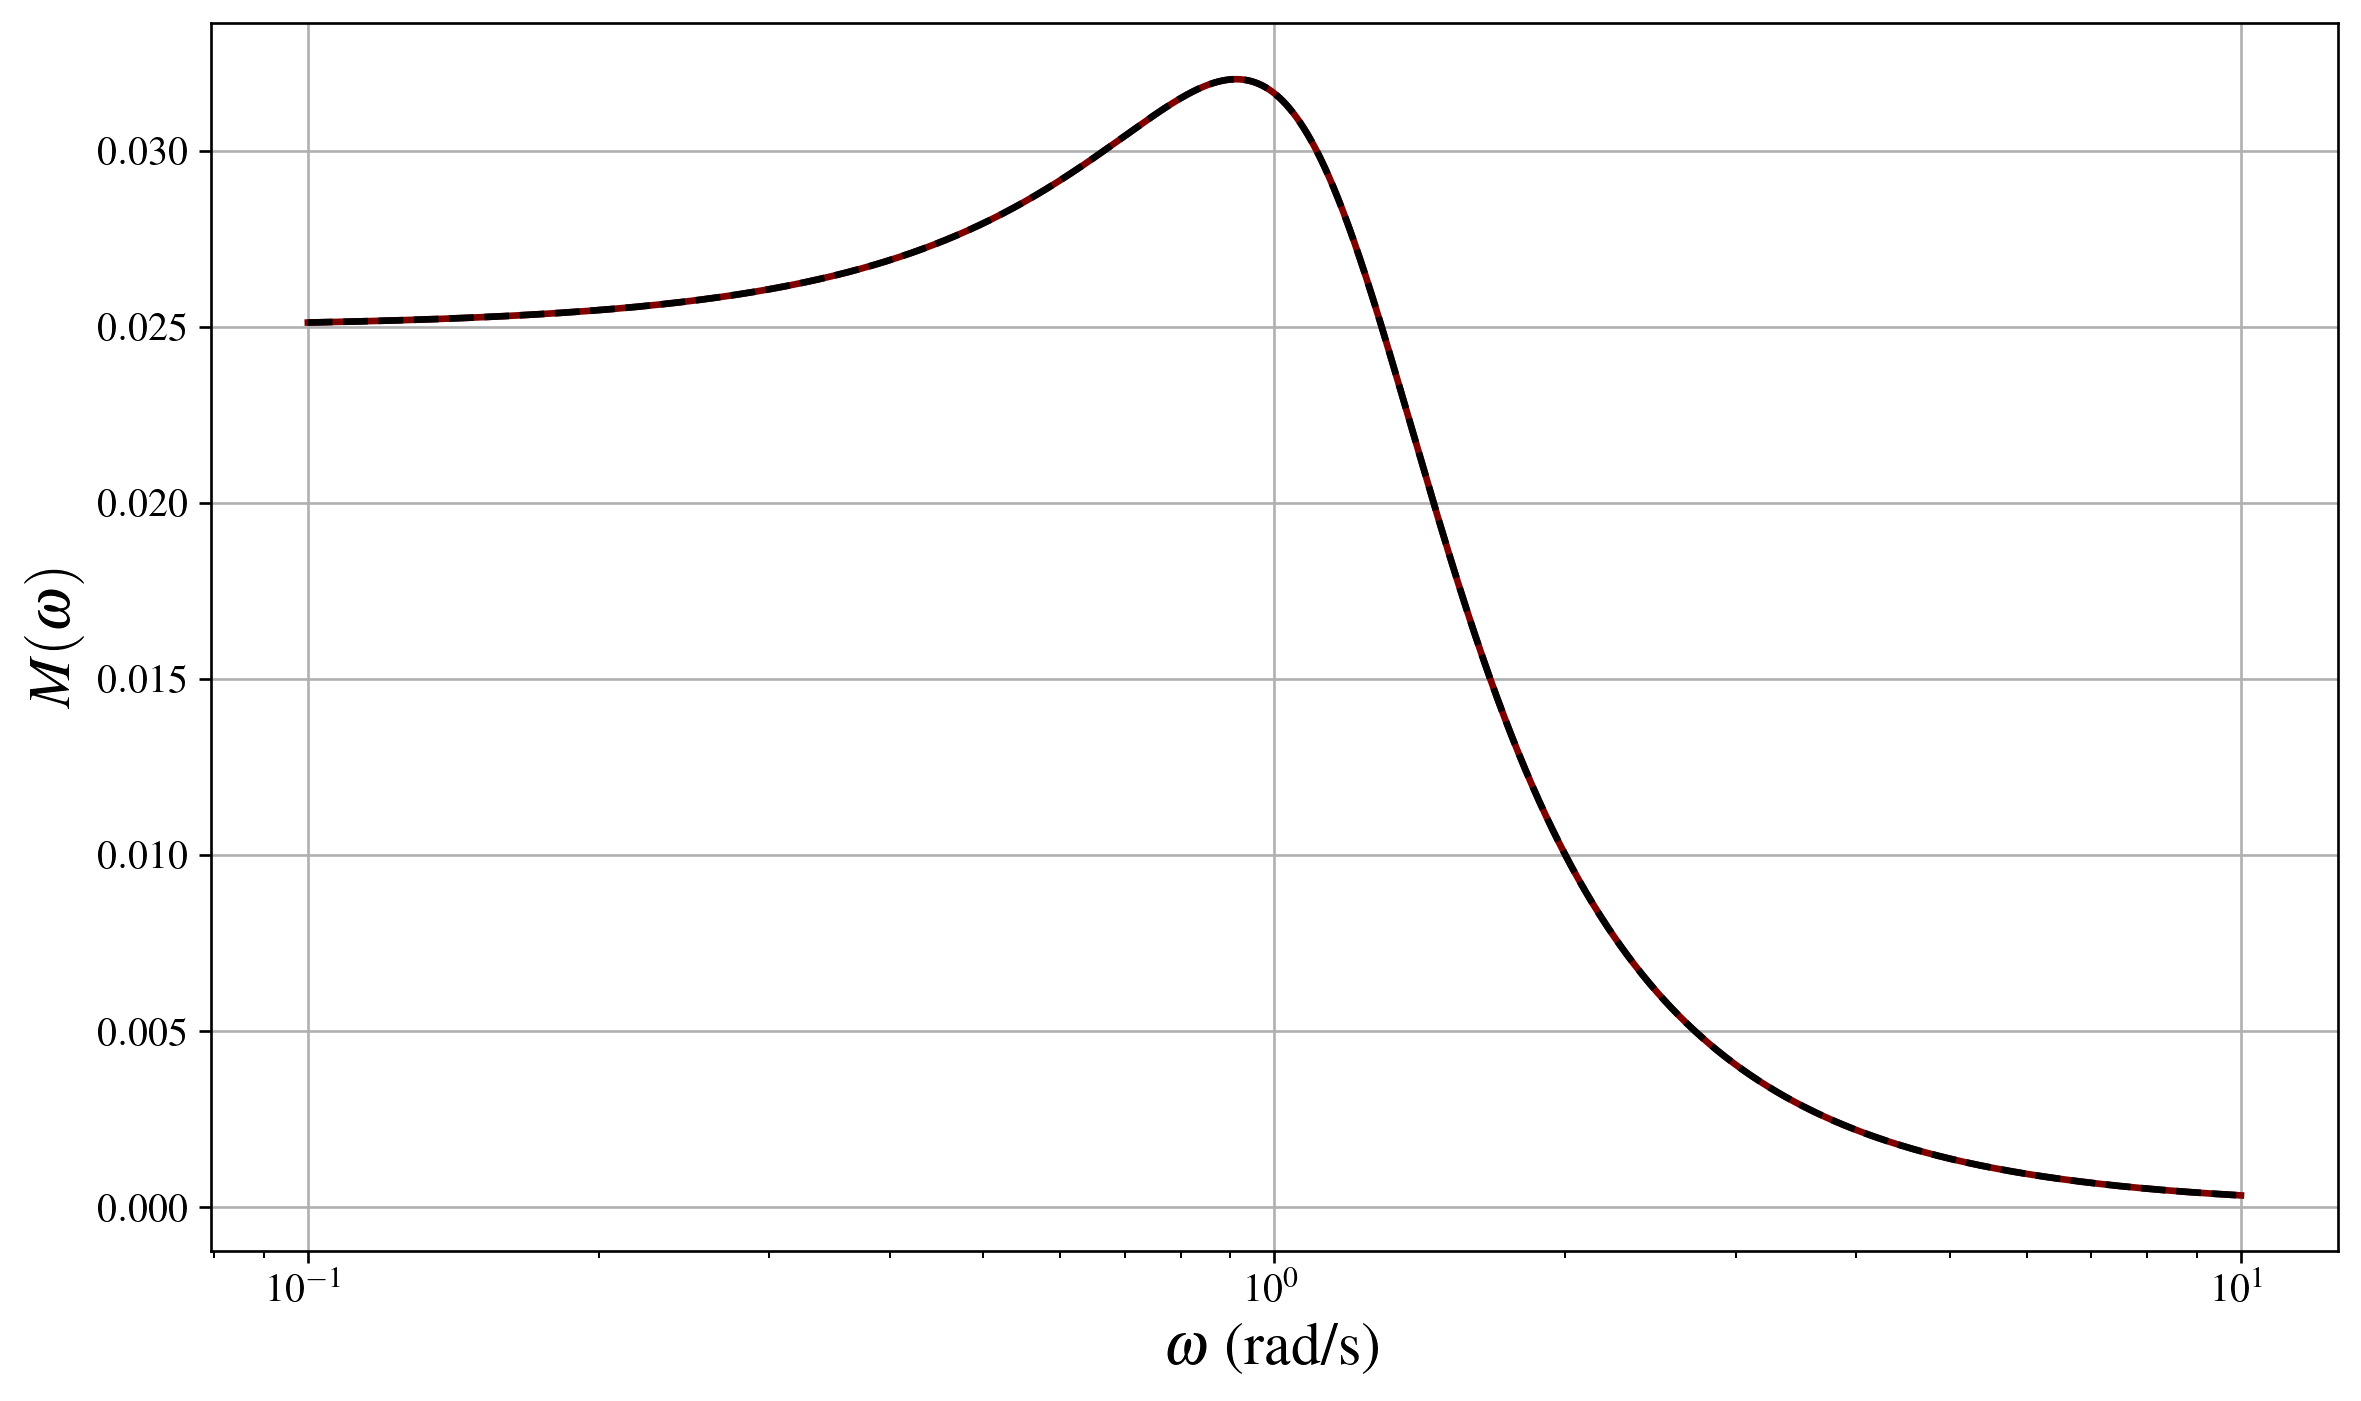

In [11]:
mag, _, _ = ct.frequency_response(T, omegas)  # Using the same omegas from above

plt.xscale('log')
plt.plot(omegas, mag)
plt.plot(omegas, mag_lamb(omegas), ls='--')
plt.xlabel(r'$\omega$ (rad/s)')
plt.ylabel(r'$M(\omega)$')
plt.show()

### Part C - Finding the Bandwidth (20 Points)

In [12]:
wn = np.sqrt(k/m)
zeta = c/(2*np.sqrt(k*m))
wr = wn*np.sqrt(1 - 2*zeta**2)
M_peak, _, _ = ct.frequency_response(T, wr)
M_peak = M_peak[0]
wr

0.9128709291752769

In [13]:
omegas[max(mag) == mag][0]

0.9128712871287129

In [14]:
M_peak = max(mag)
wr = omegas[M_peak == mag][0]

def find_band(om):
    mag_, _, _ = ct.frequency_response(T, om)
    # mag_ = mag_lamb(om)[0]
    return mag_[0] - M_peak/np.sqrt(2)

mag0, _, _ = ct.frequency_response(T, 0)
mag0[0] > M_peak/np.sqrt(2)

True

Because the magnitude at $\omega=0$ is greater than $\frac{M_{peak}}{\sqrt{2}}$, this is a low-pass filter and $\omega_1=0$. Furthermore, the damping ratio is greater than 0.382.

In [15]:
w2 = fsolve(find_band, np.array([wr + 1, ]))[0]
w2  # rad/s

1.3690019477951116

Thus, the bandwidth is $0\le\omega\le1.37\,rad/s$.